In [1]:
# librerias necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
# leer el data set
df0 = pd.read_csv('customer_shopping_data.csv')
df0.head(2)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul


In [38]:
df0['invoice_no'].nunique()

99457

In [39]:
df0['customer_id'].nunique()

99457

In [37]:
# forma del df
print(df0.shape)

(99457, 10)


In [4]:
# informacion general del df
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [5]:
# valores unicos del atributo
print("Valores unicos en payment_method:",df0['payment_method'].unique())

# numero de valores diferentes del atributo
print("numero de valores unicos:", df0['payment_method'].nunique())

Valores unicos en payment_method: ['Credit Card' 'Debit Card' 'Cash']
numero de valores unicos: 3


In [6]:
# valores unicos del atributo
print("Valores unicos en gender:",df0['gender'].unique())

Valores unicos en gender: ['Female' 'Male']


In [7]:
df1 = df0.copy()

In [8]:
# convertir el 'invoice_date' en fecha
df1['invoice_date'] = pd.to_datetime( df1['invoice_date'], dayfirst=True )

In [9]:
df1['invoice_date'].head(3)

0   2022-08-05
1   2021-12-12
2   2021-11-09
Name: invoice_date, dtype: datetime64[ns]

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   invoice_no      99457 non-null  object        
 1   customer_id     99457 non-null  object        
 2   gender          99457 non-null  object        
 3   age             99457 non-null  int64         
 4   category        99457 non-null  object        
 5   quantity        99457 non-null  int64         
 6   price           99457 non-null  float64       
 7   payment_method  99457 non-null  object        
 8   invoice_date    99457 non-null  datetime64[ns]
 9   shopping_mall   99457 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 7.6+ MB


In [11]:
# agregar columnas para años
df1['year'] = df1['invoice_date'].dt.strftime("%Y")

In [12]:
#df1.head(2)

In [13]:
# agregar columnas para meses
df1['month'] = df1['invoice_date'].dt.month

In [14]:
df1.head(3)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,year,month
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,2022,8
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,2021,12
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,2021,11


##### .1 Como es la relacion de género y número de transacciones

[Text(0.5, 1.0, 'relacion de género y número de transacciones')]

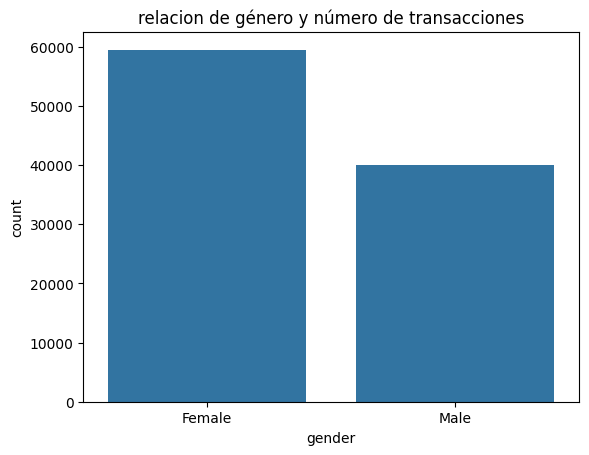

In [15]:
# Histograma: cantidad de hombres y mujeres
sns.countplot(data=df1, x='gender').set(title='relacion de género y número de transacciones')

In [16]:
# .value_counts() cantidad de elementos por categoria
gender_quantity = df1['gender'].value_counts()
print(gender_quantity)

gender
Female    59482
Male      39975
Name: count, dtype: int64


Text(0.5, 1.0, 'Relacion de transacciones entre mujeres y hombres')

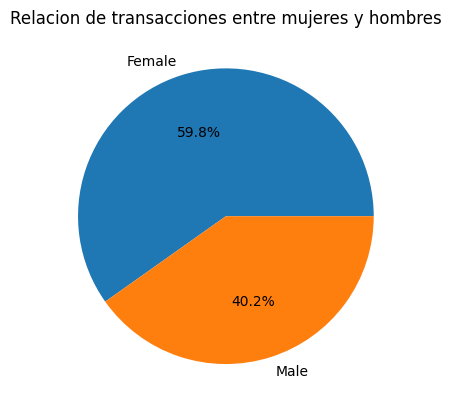

In [17]:
plt.pie(gender_quantity, labels=gender_quantity.index, autopct='%1.1f%%')
plt.title('Relacion de transacciones entre mujeres y hombres')

##### Distribución de edades por número de transacciones

In [18]:
df2 = df1.copy()

In [19]:
df2.head(2)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,year,month
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,2022,8
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,2021,12


In [20]:
df2['age'].describe()

count    99457.000000
mean        43.427089
std         14.990054
min         18.000000
25%         30.000000
50%         43.000000
75%         56.000000
max         69.000000
Name: age, dtype: float64

In [21]:
# nueva columna para categorias de edades
df2['age_cat'] = df2['age']

In [22]:
# categoria de edades
# funcion para definir cateorias de edad
# gen z: 18-25, milenials 25-34, gen x 35-49, gen boomers 50-64,
#  Gen S 65 en adelante
def category_f(age):
    if (age >= 18) and (age < 25):
        return '18-24' 
    elif (age >= 25) and (age < 35):
        return '25-34'
    elif (age >= 35) and (age < 50):
        return '35-49'
    elif (age >= 50) and (age < 65 ):
        return '50-64'
    else:
        return '65-'

In [23]:
# aplicamos la funcion
df2['age_cat'] = df2['age_cat'].apply(category_f)

In [24]:
# confirmamos que la funcion hace el trabajo
df2[['age', 'age_cat']].tail(5)

,age,age_cat
99452,45,35-49
99453,27,25-34
99454,63,50-64
99455,56,50-64
99456,36,35-49


[Text(0.5, 1.0, 'Edades por trasaccion')]

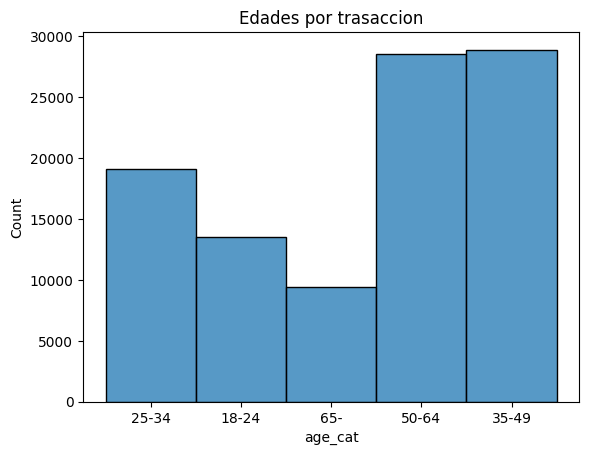

In [25]:
# histograma
sns.histplot(data=df2, x='age_cat').set(title='Edades por trasaccion')

In [26]:
df2.head(3)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,year,month,age_cat
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,2022,8,25-34
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,2021,12,18-24
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,2021,11,18-24


##### ¿Qué grupo de edad gastó más dinero?

In [27]:
# nueva
df3 = df2.copy()

In [28]:
df3['total'] = df3['quantity'] * df3['price']

In [29]:
df3[['total', 'quantity', 'price']].tail(3)

,total,quantity,price
99454,20.92,2,10.46
99455,16800.00,4,4200.00
99456,105.57,3,35.19


In [30]:
df_age_total = df3.groupby('age_cat')['total'].sum()
df_age_total.dtype

dtype('float64')

In [31]:
type(df_age_total)

pandas.core.series.Series

<Axes: xlabel='age_cat'>

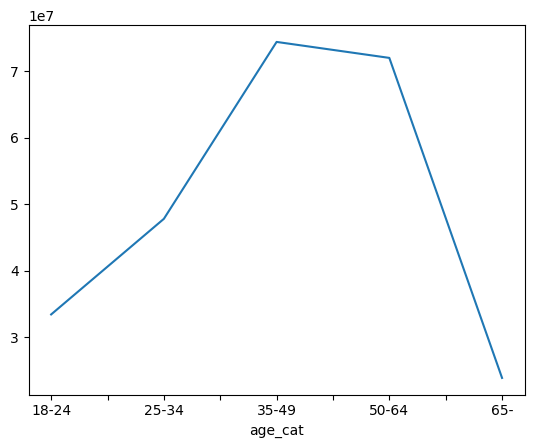

In [32]:
df_age_total.plot()

In [33]:
#sns.histplot(data=df_age_total, x='age_cat').set(title='Gasto por edades')